# **Imports + loads**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import requests
import pandas as pd
import os
import time

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install praw

In [3]:
root_dir = "/content/drive/My Drive/"
project_folder = "Python_Projects/Reddit/"

In [4]:

path="drive/My Drive/Python_Projects/Reddit/"


In [5]:
#setting Google drive directory
def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/Python_Projects/Reddit/

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [11]:
with open (path + 'pw.txt', 'r') as f:
  pw = f.read()

# Autentication with Reddit for API call


In [144]:
import requests
app_id = 'app_id'
secret = 'secret'
auth = requests.auth.HTTPBasicAuth(app_id, secret)
reddit_username = 'user_name'
reddit_password = 'pw'
data = {
'grant_type': 'password',
'username': reddit_username,
'password': reddit_password
}
headers = {'User-Agent': 'trendingapp/0.0.1'}
res = requests.post('https://www.reddit.com/api/v1/access_token',
auth=auth, data=data, headers=headers)
print(res)

<Response [200]>


In [145]:
res.json()

{'access_token': '1005520952006-DDoAQxwZZt6A42PdhR7-xSa_GL-74w',
 'token_type': 'bearer',
 'expires_in': 86400,
 'scope': '*'}

In [146]:
token = res.json()['access_token']
headers['Authorization'] = 'bearer {}'.format(token)
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [16]:
print(res.json())

{'access_token': '1005520952006-7JdskPqn_1wpF3YxwnlRrzgnnTANtw', 'token_type': 'bearer', 'expires_in': 86400, 'scope': '*'}


In [17]:
res = requests.get("https://oauth.reddit.com/r/psychology/hot",
                   headers=headers)
print(res.json())

{'kind': 'Listing', 'data': {'after': 't3_zqmx3r', 'dist': 27, 'modhash': None, 'geo_filter': None, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'psychology', 'selftext': '# Welcome to the [r/Psychology](https://www.reddit.com/r/Psychology) Research Thread!\n\nNeed participants? Looking for constructive criticism? In addition to the weekly discussion thread, the mods have instituted this thread for a surveys.\n\nGeneral submission rules are suspended in this thread, but **all top-level comments must** link to a survey and follow the formatting rules outlined below. Removal of content is still at the discretion of the moderators. [Reddiquette](https://www.reddit.com/wiki/reddiquette) applies. Personal attacks, racism, sexism, etc will be removed. Repeated violations may result in a ban. This thread will occasionally be refreshed.\n\nIn addition to posting here, post your surveys to [r/samplesize](https://www.reddit.com/r/samplesize) and join the discussion 

# **Now getting the subreddit posts**

In [21]:
item = res.json()['data']['children'][0]

Checking how to link knd and ID so we can later add additional rows in for loop and start with the last row

In [22]:
item['kind'] + '-' + item['data']['id']

't3-z9i6a2'

The time of code execution begin is :  Mon Dec 26 08:14:15 2022
The time of code execution end is :  Mon Dec 26 08:14:21 2022


In [148]:
import requests
import pandas as pd
from datetime import datetime

# we use this function to convert responses to dataframes
def df_from_response(res):
    # initialize temp dataframe for batch of data in response
    df = pd.DataFrame()

    # loop through each post pulled from res and append to df
    for post in res.json()['data']['children']:
        df = df.append({
            'post_date': post['data']['created'],
            'post_likes': post['data']['likes'],'
            'subreddit': post['data']['subreddit'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'ups': post['data']['ups'],
            'downs': post['data']['downs'],
            'score': post['data']['score'],
            'link_flair_css_class': post['data']['link_flair_css_class'],
            'created_utc': datetime.fromtimestamp(post['data']['created_utc']).strftime('%Y-%m-%dT%H:%M:%SZ'),
            'id': post['data']['id'],
            'kind': post['kind']
            
        }, ignore_index=True)

    return df

In [229]:
RealTesla = pd.DataFrame()
params = {'limit': 100, 'listing': 'top'}

# loop through 10 times (returning 1K posts)
for i in range(2):
    # make request
    res = requests.get("https://oauth.reddit.com/r/RealTesla/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df.iloc[len(new_df)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    RealTesla = RealTesla.append(new_df, ignore_index=True)
    time.sleep(4)
    print("The time of code execution end is : ", time.ctime())

The time of code execution end is :  Mon Dec 26 17:10:56 2022
The time of code execution end is :  Mon Dec 26 17:11:02 2022


In [6]:
combined = pd.read_csv("combined.csv")

In [163]:
#extracting data from these 3 subreddits
#mercedes
#audi
#teslam: teslamotors
#realtesla: realtesla

,post_date,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,kind
0,1.672062e+09,mercedes_benz,Got to try out an EQE 350+,,1.00,3.0,0.0,3.0,None,2022-12-26T13:45:03Z,zvnffn,t3
1,1.672059e+09,mercedes_benz,"S350d (2016, 44k miles) vs. E220d AMG (2019, 2...","At a similar price point, which one would you ...",1.00,1.0,0.0,1.0,None,2022-12-26T12:55:01Z,zvml1v,t3
2,1.672054e+09,mercedes_benz,A35 AMG W177 - Wireless Apple CarPlay/Android ...,I have purchased month ago brand new A35 AMG W...,1.00,1.0,0.0,1.0,None,2022-12-26T11:30:28Z,zvlbyi,t3
3,1.672048e+09,mercedes_benz,I bought a used 2018 GLC 300 in 2022: 6 Month ...,I bought a used 2018 GLC 300 4matic about 6 mo...,0.92,9.0,0.0,9.0,None,2022-12-26T09:42:58Z,zvjsu1,t3
4,1.672036e+09,mercedes_benz,2011 or 2012 Mercedes ML350?,I am currently looking to purchase my first ev...,1.00,1.0,0.0,1.0,None,2022-12-26T06:26:23Z,zvgw6u,t3
...,...,...,...,...,...,...,...,...,...,...,...,...
975,1.669398e+09,mercedes_benz,UV protection on ‘21 GLE 350 glass?,Hello all. My wife has a ‘21 GLE 350 with pano...,1.00,1.0,0.0,1.0,None,2022-11-25T17:40:05Z,z4j8sa,t3
976,1.669397e+09,mercedes_benz,does anyone knows the Mercedes part number for...,,1.00,10.0,0.0,10.0,None,2022-11-25T17:17:37Z,z4ip8l,t3
977,1.669396e+09,mercedes_benz,Lights error message,"Hi, I just changed the plate lights in a ml 32...",1.00,1.0,0.0,1.0,None,2022-11-25T17:10:53Z,z4ijj8,t3
978,1.669393e+09,mercedes_benz,Is C200 (1.5L engine) worth its price? Isn’t B...,,0.67,1.0,0.0,1.0,None,2022-11-25T16:21:43Z,z4hcyz,t3


In [170]:
#combining all of them into one dataframe
#combined = pd.concat([realtesla, teslam, mercedes, audi])

In [7]:
combined['subreddit'].value_counts()

RealTesla        988
Audi             982
mercedes_benz    980
teslamotors      355
Name: subreddit, dtype: int64

In [8]:
score_by_brand = combined.groupby('subreddit').score.mean()

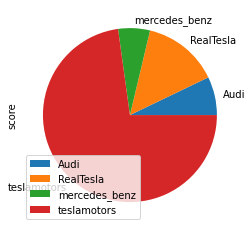

In [223]:
combined.groupby(['subreddit']).mean().plot(kind='pie', y='score')

In [13]:
#test = test.reset_index(drop=True)
combined

,Unnamed: 0,post_date,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,kind
0,0,1.672060e+09,RealTesla,TSLA Terathread - For the week of Dec 26,"We laugh at your ""giga"". \n\nFor TSLA talk, a...",1.00,4.0,0.0,4.0,NaN,2022-12-26T13:00:09Z,zvmnnw,t3
1,1,1.672032e+09,RealTesla,"Volkswagen ID.4 Price Increase By $1,500; VW C...",NaN,1.00,7.0,0.0,7.0,NaN,2022-12-26T05:22:02Z,zvfve6,t3
2,2,1.672032e+09,RealTesla,The End - The Doors,NaN,0.63,2.0,0.0,2.0,NaN,2022-12-26T05:12:56Z,zvfpva,t3
3,3,1.672019e+09,RealTesla,Enough said,NaN,0.97,432.0,0.0,432.0,NaN,2022-12-26T01:39:11Z,zvc01z,t3
4,4,1.672019e+09,RealTesla,Rising Power Prices in Europe Are Making EV Ow...,NaN,0.87,19.0,0.0,19.0,NaN,2022-12-26T01:37:41Z,zvbz4e,t3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,977,1.670598e+09,Audi,First shoot with my a7,NaN,0.95,113.0,0.0,113.0,NaN,2022-12-09T15:05:50Z,zgzn9p,t3
3301,978,1.670596e+09,Audi,Water pump?,Hi I have a 3.0 2015 Q7 I have just had a new ...,1.00,1.0,0.0,1.0,NaN,2022-12-09T14:29:48Z,zgyrwz,t3
3302,979,1.670595e+09,Audi,Question regarding detailing/ceramic coating,"Hello everyone,\n\nJust started looking into c...",1.00,2.0,0.0,2.0,NaN,2022-12-09T14:06:19Z,zgy88f,t3
3303,980,1.670594e+09,Audi,Considering a purchase of A4/A5 and have some ...,Hi All. I am a frequent reader of this thread ...,1.00,1.0,0.0,1.0,NaN,2022-12-09T13:48:28Z,zgxt70,t3


In [173]:
combined.to_csv('combined.csv')

In [54]:
z = combined[combined.subreddit == 'RealTesla']


In [55]:
z

,Unnamed: 0,post_date,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,kind
0,0,1.672060e+09,RealTesla,TSLA Terathread - For the week of Dec 26,"We laugh at your ""giga"". \n\nFor TSLA talk, a...",1.00,4.0,0.0,4.0,NaN,2022-12-26T13:00:09Z,zvmnnw,t3
1,1,1.672032e+09,RealTesla,"Volkswagen ID.4 Price Increase By $1,500; VW C...",NaN,1.00,7.0,0.0,7.0,NaN,2022-12-26T05:22:02Z,zvfve6,t3
2,2,1.672032e+09,RealTesla,The End - The Doors,NaN,0.63,2.0,0.0,2.0,NaN,2022-12-26T05:12:56Z,zvfpva,t3
3,3,1.672019e+09,RealTesla,Enough said,NaN,0.97,432.0,0.0,432.0,NaN,2022-12-26T01:39:11Z,zvc01z,t3
4,4,1.672019e+09,RealTesla,Rising Power Prices in Europe Are Making EV Ow...,NaN,0.87,19.0,0.0,19.0,NaN,2022-12-26T01:37:41Z,zvbz4e,t3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,983,1.665842e+09,RealTesla,"Inside the only lithium producer in the U.S., ...",NaN,0.57,1.0,0.0,1.0,NaN,2022-10-15T13:50:15Z,y4ohb7,t3
984,984,1.665838e+09,RealTesla,Tesla fires after hurricane raises alarm for F...,NaN,0.86,28.0,0.0,28.0,NaN,2022-10-15T12:52:32Z,y4n7fe,t3
985,985,1.665837e+09,RealTesla,Tesla Shares Get Halved,NaN,0.95,50.0,0.0,50.0,NaN,2022-10-15T12:34:10Z,y4mtbg,t3
986,986,1.665826e+09,RealTesla,MP questions whether UK should sanction Elon M...,NaN,0.91,204.0,0.0,204.0,NaN,2022-10-15T09:19:25Z,y4j9zb,t3


In [ ]:
subreddit_list = ['Audi','mercedes_benz','teslamotors','RealTesla']

In [36]:
stop_words = set(stopwords.words('english'))

In [60]:
def cloud__per_subreddit(list_sr,combined):
  import nltk
  from nltk.corpus import stopwords
  for subreddit in list_sr:
    z = combined[combined.subreddit == subreddit]
    li = []
    #extract titles from subreddit and append in list
    for row in z["title"]:
      li.append(row)
    #make string and tokenize 
    st = ' '.join(li)
    token = word_tokenize(st)
    l=[]
    #only use alphanumeric char
    for i in range(len(token)):
      l.append(re.sub(r'\W+', '', token[i]))
    #remove stopwords
    #stop_words = set(stopwords.words('english'))
    stop_words = set(stopwords.words('english')+[" ", "based", "regarding", "good", "right", "even", ""])
    filtered = []
    for w in l:
      if w.lower() not in stop_words:
          filtered.append(w)

    #make dic to count number of words
    word_dic = {}
    for j in filtered:
      if j in word_dic:
        word_dic[j] +=1
      else:
        word_dic[j] = 1
    #sort dic
    sor = {k: v for k, v in sorted(word_dic.items(), key=lambda item: item[1], reverse=True)}

    #Wordcloud
    comment_words = ''
    #stopwords = set(STOPWORDS)
    #stopwords = stopwords.words('english')+[" ", "based", "regarding", "good", "right", "even", ""] 

    #putting list back into a string
    token_2 = (" ".join(sor))

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(token_2)
 


    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()
    plt.savefig(subreddit + '.png')  



In [27]:
print(stopwords.words('english'))

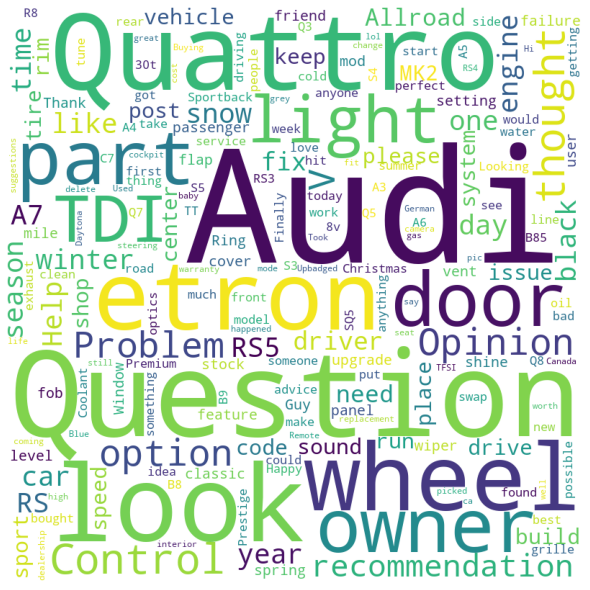

<Figure size 432x288 with 0 Axes>

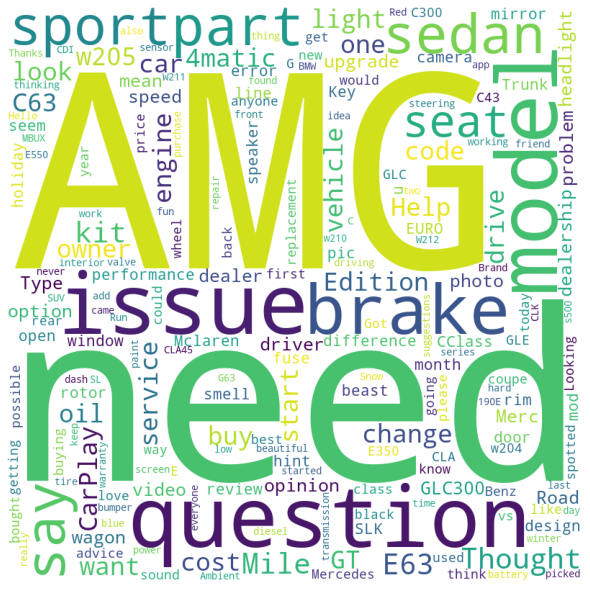

<Figure size 432x288 with 0 Axes>

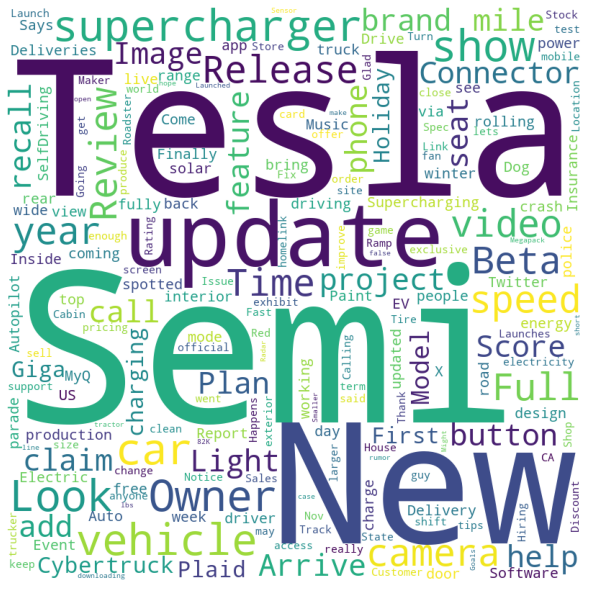

<Figure size 432x288 with 0 Axes>

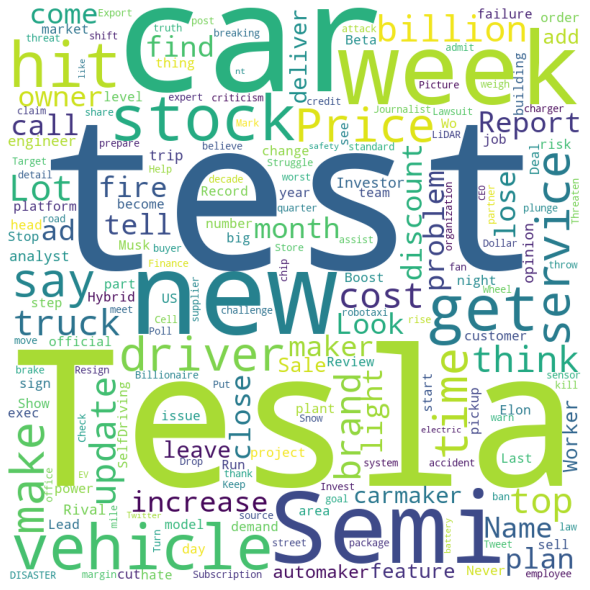

<Figure size 432x288 with 0 Axes>

In [61]:
cloud__per_subreddit(subreddit_list, combined)

In [199]:
li = []
for row in z["title"]:
    li.append(row)
    

In [205]:
st = ' '.join(li)

In [206]:
print(st)

Quattro season Quattro has been so great for this mountain road trip! Audi only It the little details. Dealership Remote start pricing? Winter rims for my Q4 e-tron Preventative Maintenance on the B9 3.0 TDI? Rear Center Armrest Cupholders Q5... Audi S6 V10 I was pipe dreaming looking at new inventory last night Conflicting Options? Scooped this hot number up for the wifey for Christmas! She’s over the moon! Could do this all day How to burn 35 miles of gas in 5 minutes 😭 P2187 Error Code on B8.5- update Does the Q4 etron have an onboard heat pump in USA/Canada? I feel attacked Key fob can't close trunk ? GTI people don’t accept me. Audi people say it’s a Golf. Where do I belong? Life is cruel sometimes Audi put summer fluid during winter?? My Xmas Rings Merry Christmas you filthy animals. Gonna stage 2+ my b9 s5 SQ5, will it last 100k Spotted this Christmas treat last week This poor Q7 Friend Illustrated my B5 for Christmas Merry Christmas everybody first time post Upkeep of Audi’s is

In [204]:

print(len(li))

982


In [197]:
#x = str(z["title"])

'0                                         Quattro season\n1      Quattro has been so great for this mountain ro...\n2                                              Audi only\n3                                 It the little details.\n4                       Dealership Remote start pricing?\n                             ...                        \n977                               First shoot with my a7\n978                                          Water pump?\n979         Question regarding detailing/ceramic coating\n980    Considering a purchase of A4/A5 and have some ...\n981    Sorry, but i wanted a bigger engine, so i migh...\nName: title, Length: 982, dtype: object'

In [189]:
print(len(x))

666


In [207]:
token = word_tokenize(st)


In [208]:
print(len(token))

10552


In [209]:
#Step 2: running a regex to keep only alphanumeric
l=[]
for i in range(len(token)):
    l.append(re.sub(r'\W+', '', token[i]))

In [210]:
print(len(l))

10552


In [216]:
stop_words = set(stopwords.words('english'))
stopwords = stopwords.words('english')+[" ", "based", "regarding", "good", "right", "even", ""]
#print(stop_words)


In [217]:
filtered = []
for w in l:
    if w.lower() not in stopwords:
        filtered.append(w)
print(len(filtered))

5746


In [218]:
word_dic = {}
for i in filtered:
    if i in word_dic:
        word_dic[i] +=1
    else:
        word_dic[i] = 1



In [219]:
sor = {k: v for k, v in sorted(word_dic.items(), key=lambda item: item[1], reverse=True)}
print(sor)

{'Audi': 214, 'car': 55, 'A3': 44, 'new': 39, 'Quattro': 34, 'A4': 34, 'first': 29, 'A6': 28, 'know': 27, '2018': 27, 'anyone': 27, 'S5': 27, 'Q5': 25, 'one': 23, 'miles': 21, 'RS5': 21, 'snow': 21, 'New': 21, 'B9': 20, 'Christmas': 20, '2023': 20, 'time': 19, 'winter': 18, 'got': 18, 'A5': 18, 'vs': 18, 'like': 17, 'back': 16, 'get': 16, 'Sportback': 16, 'S3': 16, 'much': 16, 'Merry': 15, '2016': 15, 'S4': 15, 'Help': 15, 'SQ5': 14, 'Q7': 14, '2021': 14, 'look': 14, 'RS3': 14, 'wheels': 14, '2019': 14, 'Anyone': 14, 'last': 13, 'buy': 13, '2017': 13, 'Winter': 12, 'B85': 12, 'A7': 12, '2015': 12, '2022': 12, 'First': 12, 'bought': 12, 'MMI': 12, 'engine': 12, 'etron': 11, 'love': 11, '20': 11, 'Looking': 11, 'help': 11, 'mine': 11, 'little': 10, 'day': 10, 'nt': 10, '2': 10, 'R8': 10, 'best': 10, 'front': 10, 'would': 10, 'Finally': 10, 'B8': 10, 'year': 10, 'could': 10, 'wheel': 9, 'Premium': 9, 'Plus': 9, 'audi': 9, 'a4': 9, 'RS': 9, 'amp': 9, 'RS6': 9, 'bad': 9, 'else': 9, 'TT': 9,

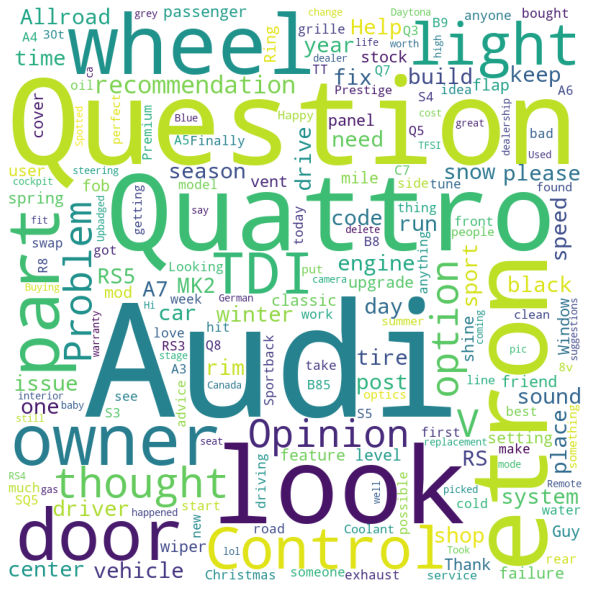

In [220]:
import matplotlib.pyplot as plt
#Wordcloud
comment_words = ''
stopwords = set(STOPWORDS)

 

#putting list back into a string
token_2 = (" ".join(sor))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(token_2)
 


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
plt.savefig('foo.png')

In [ ]:
#import datetime
#df["date"] = pd.to_datetime(df['post_date'], unit='s')

In [ ]:
#pd.options.display.max_colwidth =200

## **Now getting the comments via praw**

In [22]:
reddit = praw.Reddit(
    client_id="inm1hZMu9XL-YDsSeNAUMQ",
    client_secret="mk7pclMJi2w7rM2NPzlldn97JVmuDg",
    password="Lines123",
    user_agent="testscript by u/trendingapp",
    username="mluehe123",
)

first getting hot posts for a subreddit

In [30]:
hot_posts = reddit.subreddit('python').hot(limit=10)

In [ ]:
hot_posts = reddit.subreddit('python').hot(limit=10)
for post in hot_posts:
    print(post.title)

In [82]:
posts = []
psy_subreddit = reddit.subreddit('psychology')
for post in psy_subreddit.hot(limit=5):
    posts.append([post.title, post.ups, post.downs, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'ups', 'downs', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts

In [ ]:
posts.to_csv('top_psy_subreddit_posts.csv') #saving tzhe output

# **Comments**

In [83]:
submission = reddit.submission(id="z9i6a2") #id comes after comments/

In [ ]:
from praw.models import MoreComments
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

# Neuer Abschnitt

In [53]:

''' 
subreddit = 'psychology'
limit = 100
timeframe = 'year' #hour, day, week, month, year, all
listing = 'top' # controversial, best, hot, new, random, rising, top
 
def get_reddit(subreddit,listing,limit,timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'yourbot'})
    except:
        print('An Error Occured')
    return request.json()
 
r = get_reddit('psychology','top',2000,'year')'''

In [73]:
s = get_reddit(subreddit,listing,1,timeframe)
for post in s['data']['children']:
  for k in post['data'].keys():
        print(k)

{'kind': 'Listing',
 'data': {'after': 't3_tbl1zo',
  'dist': 1,
  'modhash': '',
  'geo_filter': '',
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'psychology',
     'selftext': '',
     'author_fullname': 't2_39i1zb05',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'Baby boomers are more sensitive than millennials, according to the largest-ever study on narcissism',
     'link_flair_richtext': [],
     'subreddit_name_prefixed': 'r/psychology',
     'hidden': False,
     'pwls': 6,
     'link_flair_css_class': None,
     'downs': 0,
     'thumbnail_height': 80,
     'top_awarded_type': None,
     'hide_score': False,
     'name': 't3_tbl1zo',
     'quarantine': False,
     'link_flair_text_color': 'dark',
     'upvote_ratio': 0.88,
     'author_flair_background_color': None,
     'subreddit_type': 'public',
     'ups': 34239,
     'total_awards_received': 5,
     'media_embed': {},
  

In [55]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import praw
CLIENT_ID = 'inm1hZMu9XL-YDsSeNAUMQ'
SECRET_KEY = 'mk7pclMJi2w7rM2NPzlldn97JVmuDg'
my_user_agent = 'my user agent'

In [70]:
reddit = praw.Reddit(
    client_id="inm1hZMu9XL-YDsSeNAUMQ",
    client_secret="mk7pclMJi2w7rM2NPzlldn97JVmuDg",
    password="Lines123",
    user_agent="testscript by u/trendingapp",
    username="mluehe123",
)

In [71]:
hot_posts = reddit.subreddit('python').hot(limit=10)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Sunday Daily Thread: What's everyone working on this week?
Monday Daily Thread: Project ideas!
If you're a beginner interested in data science and machine learning, I recently produced a video series that goes through all of the major algorithms and their implementations in Python! I put a lot of work into each tutorial, so hopefully this helps out!
I know this isn't much, but I made Minesweeper using Python. Really proud how it turned out!
Comprehensive Python Cheatsheet
pypp: C-style macros for Python!
Asynchronous Programming in Python
I used Python to control a custom stop-motion animation drawing machine
I wrote a simplistic Python script for Windows that automatically adjusts monitor brightness and contrast based on the time of the day
NoPy - An unofficial OOP interface for the Notion API.


False
